In [108]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 

In [109]:
class_names = [ 'Covid-19',  'Normal' , 'Viral Pneumonia' ]

In [110]:
XRay_Directory = 'chestData/train'
os.listdir(XRay_Directory)

['Covid', 'Normal', 'Viral Pneumonia']

In [111]:
image_generator= ImageDataGenerator(rescale= 1./255, validation_split=0.2)

train_generator=image_generator.flow_from_directory(batch_size=60,
                                                    directory= XRay_Directory,
                                                    shuffle= True,
                                                    target_size=(256,256),
                                                    class_mode= 'categorical',
                                                    subset= 'training')
train_images,train_labels= next(train_generator)
train_images.shape
train_labels.shape

Found 201 images belonging to 3 classes.


(60, 3)

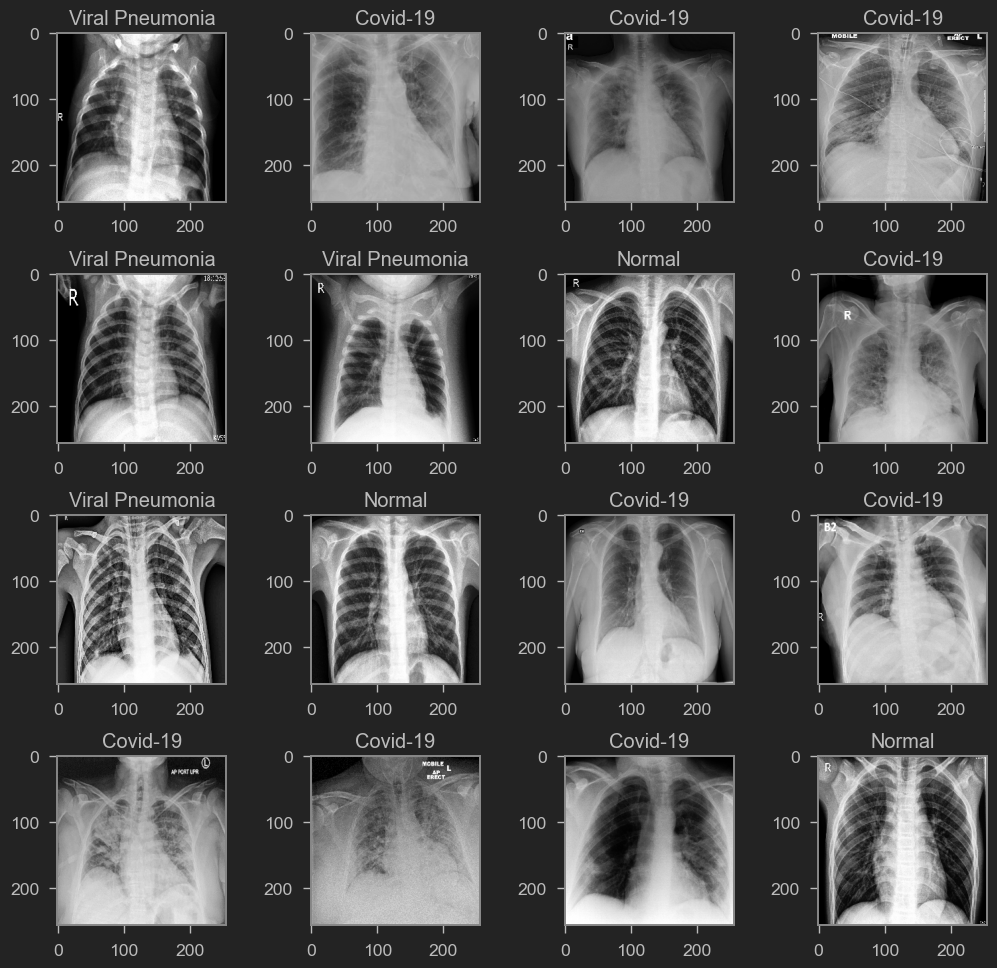

In [112]:
L = 4
W = 4
label_names = {0 : 'Covid-19', 1 : 'Normal' , 2: 'Viral Pneumonia'}
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i],cmap=plt.cm.binary)
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    
    plt.subplots_adjust(wspace = 0.5)    

In [113]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 15)                11775     
                                                                 
 dense_17 (Dense)            (None, 10)                160       
                                                                 
Total params: 11935 (46.62 KB)
Trainable params: 11935 (46.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [115]:
epochs=50

batch_size = 32

history = main_model.fit(train_generator,
                         steps_per_epoch=num_train_samples//batch_size,
                         epochs=epochs,
                         callbacks=callbacks,
                         validation_data=val_generator,
                         validation_steps=num_val_samples//batch_size)

NameError: name 'main_model' is not defined

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Pérdida: ',test_loss)
print('Precisión: ', test_acc)

pred = model.predict(test_images)

print(pred[0])

print(np.max(pred[0]))
print(np.argmax(pred[0]))